In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [3]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# trained the regression model with the train data
X=data[['lstat','rm','ptratio']]
y=data[['medv']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train)
train_y = np.asanyarray(y_train)
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.55753687  4.30844961 -0.96539269]]
Intercept:  [20.43467139]


Mean absolute error: 4.02
Residual sum of squares (MSE): 27.01
R2-score: 0.54
5.197066709951716


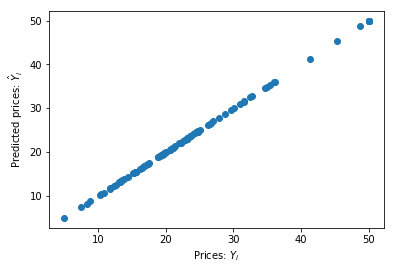

In [6]:
#testing our model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
plt.scatter(y_test, test_y)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")

mse = sqrt(mean_squared_error( test_y_,y_test))
print(mse)
#accuracy of 69% implies it is not a great fit to the linear model that we thought it would be